Sample of dataset:
   Time      Amount
0     1  112.702251
1     1   78.395983
2     1   73.886049
3     4   84.984763
4     8   79.490003


/Users/shrushta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/shrushta/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/Users/shrushta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


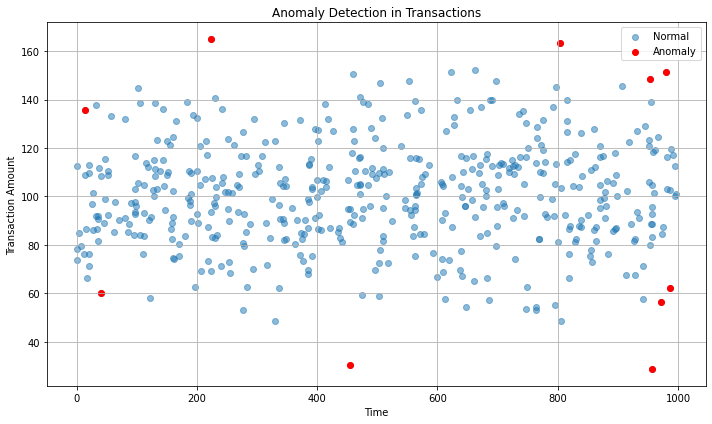

Anomalies saved to ../output/anomalies_detected.csv


In [2]:
# 📁 real-time-anomaly-detection/notebook/anomaly_detection.ipynb

"""
Title: Real-Time Anomaly Detection in Financial Transactions
"""

# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import os

# Step 2: Load Sample Dataset (Simulated)
data_path = os.path.join('..', 'data', 'transactions.csv')
data_dir = os.path.dirname(data_path)
os.makedirs(data_dir, exist_ok=True)

if not os.path.exists(data_path):
    # Create a dummy dataset if it doesn't exist
    np.random.seed(42)
    data = pd.DataFrame({
        'Time': np.sort(np.random.randint(0, 1000, size=500)),
        'Amount': np.random.normal(loc=100, scale=20, size=500)
    })
    data.to_csv(data_path, index=False)
else:
    data = pd.read_csv(data_path)

print("Sample of dataset:")
print(data.head())

# Step 3: Train Isolation Forest on 'Amount' and 'Time'
model = IsolationForest(contamination=0.02, random_state=42)
data['anomaly_score'] = model.fit_predict(data[['Amount', 'Time']])

# Step 4: Visualize Anomalies
plt.figure(figsize=(10,6))
anomalies = data[data['anomaly_score'] == -1]
plt.scatter(data['Time'], data['Amount'], label='Normal', alpha=0.5)
plt.scatter(anomalies['Time'], anomalies['Amount'], color='r', label='Anomaly')
plt.xlabel('Time')
plt.ylabel('Transaction Amount')
plt.title('Anomaly Detection in Transactions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Export Anomalies (Optional)
output_dir = os.path.join('..', 'output')
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'anomalies_detected.csv')
anomalies.to_csv(output_path, index=False)
print(f"Anomalies saved to {output_path}")
